## Census Income dataset

dataset from: https://archive.ics.uci.edu/ml/datasets/Census+Income

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./adult.data', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'class']

In [3]:
df_t = pd.read_csv('./adult.test', header=None, skiprows=[0])
df_t.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation',
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'class']

In [4]:
df_all = pd.concat((df, df_t)).reset_index(drop=True)

In [5]:
df.shape[0], df_t.shape[0]

(32561, 16281)

In [6]:
df_all.shape

(48842, 15)

In [7]:
# from train to end
df_all.iloc[df.shape[0]:][:2]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
32561,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
32562,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [8]:
df.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [9]:
df_t.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.


In [10]:
df_all['class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [11]:
# Checking for class imbalanced
df_all['class'].value_counts(normalize=True)

 <=50K     0.506122
 <=50K.    0.254596
 >50K      0.160538
 >50K.     0.078744
Name: class, dtype: float64

In [12]:
df_all['class'] = df_all['class'].str.replace(' <=50K.', ' <=50K')
df_all['class'] =df_all['class'].str.replace(' >50K.', ' >50K')

In [13]:
df_all['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [14]:
# To be continue, need to keep track of train and test rows removed

In [15]:
df_all.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [16]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
df_t.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [18]:
df_all.isnull().sum() # Checking for null values

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class             0
dtype: int64

In [19]:
df_all.nunique() # Checking no. of unique values for each features, if 1 we can discard it, since there is no significant relationship between features

age                  74
workclass             9
fnlwgt            28523
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        123
capital_loss         99
hours_per_week       96
native_country       42
class                 2
dtype: int64

In [20]:
df_all['class'].unique(), df_all['class'].nunique()

(array([' <=50K', ' >50K'], dtype=object), 2)

In [21]:
df_all['class_ind'] = 0
df_all.loc[df_all['class'] == ' >50K', 'class_ind'] = 1

In [22]:
df_all.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,class_ind
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0


In [23]:
df_all['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [24]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 16 columns):
age               48842 non-null int64
workclass         48842 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
education_num     48842 non-null int64
marital_status    48842 non-null object
occupation        48842 non-null object
relationship      48842 non-null object
race              48842 non-null object
sex               48842 non-null object
capital_gain      48842 non-null int64
capital_loss      48842 non-null int64
hours_per_week    48842 non-null int64
native_country    48842 non-null object
class             48842 non-null object
class_ind         48842 non-null int64
dtypes: int64(7), object(9)
memory usage: 6.0+ MB


Apparently there is no null values, however according to dataset description features, unknown are converted to "?"

Let's inspect all the features which contains "?"

In [25]:
df_all['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [26]:
df_all['workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [27]:
df_all['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [28]:
df_all['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [29]:
df_all['occupation'].value_counts()

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5611
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [30]:
df_all['native_country'].value_counts()

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

In [31]:
df_all.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,class_ind
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [32]:
df_all[['education', 'education_num']][:2]

,education,education_num
0,Bachelors,13
1,Bachelors,13


In [33]:
pd.crosstab(df_all['education'], df_all['education_num'])

education_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


Later on, we can remove education, since education_num has been provided for ranking
race has no impact on how much one can earned, so we can safetly ignore the feature (could be useful)

dummy_variable: workclass, (education_num), marital_status, occupation, relationship, (native_country)
variable to remove: class, race, 
sex: to categorical variable (0, 1)
standardization: capital_gain, capital_loss, hours_per_week


In [34]:
df.age.describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [35]:
df_all.shape

(48842, 16)

In [36]:
df_all.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,class_ind
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0


In [37]:
df_all['fnlwgt'].nunique()

28523

In [38]:
df_all.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,class_ind
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382,0.239282
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


Lets access the age distribution

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
plt.hist(df['age'])
plt.show()

<Figure size 800x550 with 1 Axes>

In [40]:
df_all.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,class_ind
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [41]:
df_all['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [42]:
df['age'].max(), df_t['age'].max()

(90, 90)

(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <a list of 10 Patch objects>)

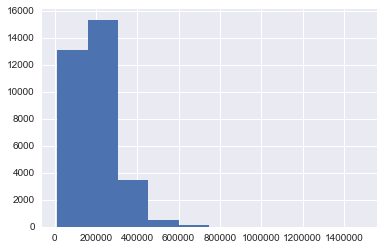

In [43]:
plt.hist(df['fnlwgt']) # Visualize train data not test

In [44]:
df_all.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,class_ind
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [45]:
# Convert age feature to age_band
# into 5 bin, since the max
# Okay so the maximum age of a passenger was 90. 
# So lets divide the range from 0-90 into 5 bins. So 90/5=18. So bins of size 18.
df_all['age_band'] = 0
df_all.loc[df_all['age'] <= 18, 'age_band'] = 0
df_all.loc[(df_all['age'] > 18) & (df_all['age'] <= 36), 'age_band'] = 1
df_all.loc[(df_all['age'] > 36) & (df_all['age'] <= 54), 'age_band'] = 2
df_all.loc[(df_all['age'] > 54) & (df_all['age'] <= 72), 'age_band'] = 3
df_all.loc[df_all['age'] > 72, 'age_band'] = 4

In [46]:
df_all['hours_per_week'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [47]:
df_all['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [48]:
df_all['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [49]:
df_all.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,class_ind,age_band
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,2
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,2


In [50]:
from sklearn.preprocessing import StandardScaler

In [51]:
df_all['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [52]:
df_all['fnlwgt'].describe()

count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

In [53]:
df_all['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [54]:
df_all.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,class_ind,age_band
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0,2
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0,2
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0,2
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0,2
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0,1


Split up train and test so we can drop the unknown "?" values

In [55]:
# Need to handle class imbalance

In [56]:
df_all.shape, df.shape, df_t.shape

((48842, 17), (32561, 15), (16281, 15))

In [57]:
# after preprocessing store the respective train and test set to handle class imbalance
train_actual = df_all.iloc[:df.shape[0]]
test_actual = df_all.iloc[df.shape[0]:]

In [58]:
train_actual.shape, test_actual.shape

((32561, 17), (16281, 17))

In [59]:
## sort by class_ind, so we can partition data to equal splits for dealing with class imbalanced
train_actual = train_actual.sort_values(by='class_ind', ascending=False)

In [60]:
class1 = train_actual['class_ind'].value_counts()[1]
class0 = train_actual['class_ind'].value_counts()[0]

In [61]:
class0, class1 # class imbalance..

(24720, 7841)

In [62]:
train_1 = train_actual[:class1]
train_0 = train_actual[class1:class1+class1]

In [63]:
train = pd.concat([train_1, train_0], axis=0)
test = test_actual

In [64]:
# train = df_all.iloc[:df.shape[0]] 
# test = df_all.iloc[df.shape[0]:]

In [65]:
train.shape, test.shape

((15682, 17), (16281, 17))

In [66]:
train['workclass'].unique(), test['workclass'].unique()

(array([' Self-emp-inc', ' Local-gov', ' State-gov', ' Federal-gov',
        ' Private', ' Self-emp-not-inc', ' ?', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' Private', ' Local-gov', ' ?', ' Self-emp-not-inc',
        ' Federal-gov', ' State-gov', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object))

In [67]:
train['workclass'].unique(), train['occupation'].unique(), train['native_country'].unique()

(array([' Self-emp-inc', ' Local-gov', ' State-gov', ' Federal-gov',
        ' Private', ' Self-emp-not-inc', ' ?', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' Exec-managerial', ' Craft-repair', ' Prof-specialty',
        ' Tech-support', ' Sales', ' Handlers-cleaners',
        ' Protective-serv', ' Machine-op-inspct', ' Adm-clerical',
        ' Transport-moving', ' Other-service', ' ?', ' Farming-fishing',
        ' Armed-Forces', ' Priv-house-serv'], dtype=object),
 array([' United-States', ' Columbia', ' France', ' Mexico', ' England',
        ' ?', ' Iran', ' Canada', ' India', ' Haiti', ' Germany', ' Cuba',
        ' Poland', ' China', ' Italy', ' South', ' Hong', ' Philippines',
        ' Jamaica', ' Japan', ' Puerto-Rico', ' Taiwan', ' El-Salvador',
        ' Greece', ' Ireland', ' Ecuador', ' Scotland', ' Hungary',
        ' Portugal', ' Cambodia', ' Vietnam', ' Laos', ' Thailand',
        ' Yugoslavia', ' Nicaragua', ' Trinadad&Tobago', ' Guatemala',
   

In [68]:
" ?" in list(train['workclass']), " ?" in list(train['occupation']), " ?" in list(train['native_country'])

(True, True, True)

In [69]:
" ?" in list(test['workclass']), " ?" in list(test['occupation']), " ?" in list(test['native_country'])

(True, True, True)

In [70]:
train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,class_ind,age_band
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K,1,2
25061,49,Self-emp-inc,246739,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,United-States,>50K,1,2
9827,51,Local-gov,117496,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,>50K,1,2
9828,64,State-gov,216160,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,Columbia,>50K,1,3
25072,53,Federal-gov,177647,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,France,>50K,1,2


In [71]:
# Dropping ? rows
train = train.drop(train[train['workclass'] == ' ?'].index)
train = train.drop(train[train['occupation'] == ' ?'].index)
train = train.drop(train[train['native_country'] == ' ?'].index)

test = test.drop(test[test['workclass'] == ' ?'].index)
test = test.drop(test[test['occupation'] == ' ?'].index)
test = test.drop(test[test['native_country'] == ' ?'].index)

In [72]:
# Check if there're any " ?" left
" ?" in list(train['workclass']), " ?" in list(train['occupation']), " ?" in list(train['native_country'])

(False, False, False)

In [73]:
" ?" in list(test['workclass']), " ?" in list(test['occupation']), " ?" in list(test['native_country'])

(False, False, False)

Creation of dummy variable for categorical columns

In [74]:
dummy_wkcls = pd.get_dummies(train['workclass'], prefix='workclass') # to remove Without-pay column
# fnlwgt_std = StandardScaler().fit_transform(df['fnlwgt'][:, np.newaxis]) # pending (regression only)
dummy_maristat = pd.get_dummies(train['marital_status'], prefix='maristat') # to remove widowed
dummy_occupt = pd.get_dummies(train['occupation'], prefix='occupt') # to remove Transport-moving
dummy_rls = pd.get_dummies(train['relationship'], prefix='rls') # to remove Unmarried
dummy_race = pd.get_dummies(train['race'], prefix='race') # to remove White and possibly can exclude this variable
train['sex'].replace([' Male', ' Female'], [0, 1], inplace=True) # Convert sex to categorical

# regression only
# cpt_gn_scaled = StandardScaler().fit_transform(df['capital_gain'][:, np.newaxis]) # Scaling continuous value (newaxis fixed: Expected 2D array, got 1D array instead)
# cpt_ls_scaled = StandardScaler().fit_transform(df['capital_loss'][:, np.newaxis]) # Scaling continuous value
# hrs_per_wk = StandardScaler().fit_transform(df['hours_per_week']) # pending
dummy_native_country = pd.get_dummies(train['native_country'], prefix='native_country') # to remove Vietnam

In [75]:
# another set for test data
dummy_wkcls_t = pd.get_dummies(test['workclass'], prefix='workclass') # to remove Without-pay column
# fnlwgt_std = StandardScaler().fit_transform(df['fnlwgt'][:, np.newaxis]) # pending (regression only)
dummy_maristat_t = pd.get_dummies(test['marital_status'], prefix='maristat') # to remove widowed
dummy_occupt_t = pd.get_dummies(test['occupation'], prefix='occupt') # to remove Transport-moving
dummy_rls_t = pd.get_dummies(test['relationship'], prefix='rls') # to remove Unmarried
dummy_race_t = pd.get_dummies(test['race'], prefix='race') # to remove White and possibly can exclude this variable
test['sex'].replace([' Male', ' Female'], [0, 1], inplace=True) # Convert sex to categorical

# regression only
# cpt_gn_scaled = StandardScaler().fit_transform(df['capital_gain'][:, np.newaxis]) # Scaling continuous value (newaxis fixed: Expected 2D array, got 1D array instead)
# cpt_ls_scaled = StandardScaler().fit_transform(df['capital_loss'][:, np.newaxis]) # Scaling continuous value
# hrs_per_wk = StandardScaler().fit_transform(df['hours_per_week']) # pending
dummy_native_country_t = pd.get_dummies(test['native_country'], prefix='native_country') # to remove Vietnam

In [76]:
train['sex'].unique(), train['sex'].unique()

(array([1, 0], dtype=int64), array([1, 0], dtype=int64))

In [77]:
# Train categorical variable
age_band = train['age_band']
class_ind = train['class_ind']
edu_no = train['education_num']
hrs_per_wk = train['hours_per_week']

# Test categorical variable
age_band_t = test['age_band']
class_ind_t = test['class_ind']
edu_no_t = test['education_num']
hrs_per_wk_t = test['hours_per_week']

In [78]:
# Train dataset
df_new = pd.concat([age_band, dummy_wkcls, train['fnlwgt'], edu_no, dummy_maristat, dummy_occupt,
                   dummy_rls, dummy_race, train['capital_gain'], train['capital_loss'], hrs_per_wk,
                   dummy_native_country, class_ind], axis=1)

# Test dataset
df_new_t = pd.concat([age_band_t, dummy_wkcls_t, test['fnlwgt'], edu_no_t, dummy_maristat_t, dummy_occupt_t,
                   dummy_rls_t, dummy_race_t, test['capital_gain'], test['capital_loss'], hrs_per_wk_t,
                   dummy_native_country_t, class_ind_t], axis=1)

In [79]:
df_new.head(2)

,age_band,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,fnlwgt,education_num,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,class_ind
32560,2,0,0,0,1,0,0,0,287927,9,...,0,0,0,0,0,0,1,0,0,1
25061,2,0,0,0,1,0,0,0,246739,10,...,0,0,0,0,0,0,1,0,0,1


In [80]:
df_new_t.head(2)

,age_band,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,fnlwgt,education_num,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,class_ind
32561,1,0,0,1,0,0,0,0,226802,7,...,0,0,0,0,0,0,1,0,0,0
32562,2,0,0,1,0,0,0,0,89814,9,...,0,0,0,0,0,0,1,0,0,0


train has 87 columns and test has only 86 columns

In [81]:
list(set(df_new.columns) - set(df_new_t.columns))

['native_country_ Holand-Netherlands']

In [82]:
## To remove native country from test

In [83]:
df_new = df_new.drop(columns=['native_country_ Holand-Netherlands'])

In [84]:
list(set(df_new.columns) - set(df_new_t.columns))

[]

In [85]:
X = df_new.iloc[:, :-1]
y = df_new['class_ind']

In [86]:
X.shape, y.shape

((14681, 85), (14681,))

## Let's create our model

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

c:\users\o\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [88]:
X_train.shape, y_train.shape

((10276, 85), (10276,))

### Train test split on actual training data

In [89]:
rf_fit = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=100, min_samples_split=3, min_samples_leaf=2, random_state=42)
rf_fit.fit(X_train, y_train)

print('Random Forest - Train Confusion Matrix\n\n', pd.crosstab(y_train, rf_fit.predict(X_train),
                                                               rownames=['Actuall'], colnames=['Predicted']), sep="")
print('\nRandom Forest - Train accuracy', round(accuracy_score(y_train, rf_fit.predict(X_train)), 3))

print('\nRandom Forest - Test Confusion Matrix\n\n', pd.crosstab(y_test, rf_fit.predict(X_test),
                                                                rownames=['Actuall'], colnames=['Predicted']), sep="")
print('\nRandom Forest - Test accuracy', round(accuracy_score(y_test, rf_fit.predict(X_test)), 3))

Random Forest - Train Confusion Matrix

Predicted     0     1
Actuall              
0          4261   760
1           441  4814

Random Forest - Train accuracy 0.883

Random Forest - Test Confusion Matrix

Predicted     0     1
Actuall              
0          1699   453
1           298  1955

Random Forest - Test accuracy 0.83


###  We've fitted our training data instance, lets predict and validate on our actual test data

In [90]:
test_data_X = df_new_t.iloc[:, :-1]
test_data_y = df_new_t['class_ind']
test_data_X.head(2)

,age_band,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,fnlwgt,education_num,...,native_country_ Portugal,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia
32561,1,0,0,1,0,0,0,0,226802,7,...,0,0,0,0,0,0,0,1,0,0
32562,2,0,0,1,0,0,0,0,89814,9,...,0,0,0,0,0,0,0,1,0,0


In [91]:
print('Random Forest - Test Confusion Matrix\n\n', pd.crosstab(test_data_y, rf_fit.predict(test_data_X),
                                                               rownames=['Actual'], colnames=['Predicted']), sep="")
print('\nRandom Forest - Test accuracy', round(accuracy_score(test_data_y, rf_fit.predict(test_data_X)), 3))

Random Forest - Test Confusion Matrix

Predicted     0     1
Actual               
0          8952  2408
1           536  3164

Random Forest - Test accuracy 0.805


#### Our best score is 80.5%; (Previously was 85.9% for class imbalanced) Let's check whether our accuracy improved if we trained on all the train instances w/o class imbalanced.

In [92]:
## Fitting to whole training data w/o splitting
rf_fit = RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=100, min_samples_split=3, min_samples_leaf=2, random_state=42)
rf_fit.fit(X, y)
print('Random Forest - Train Confusion Matrix\n\n', pd.crosstab(y, rf_fit.predict(X),
                                                               rownames=['Actual'], colnames=['Predicted']), sep="")
print('\nRandom Forest - Train accuracy', round(accuracy_score(y, rf_fit.predict(X)), 3))

Random Forest - Train Confusion Matrix

Predicted     0     1
Actual               
0          6112  1061
1           655  6853

Random Forest - Train accuracy 0.883


### Predict and validate on our actual test data (With class imbalanced)

In [93]:
# print('Random Forest - Test Confusion Matrix\n\n', pd.crosstab(test_data_y, rf_fit.predict(test_data_X),
#                                                                rownames=['Actuall'], colnames=['Predicted']), sep="")
# print('\nRandom Forest - Test accuracy', round(accuracy_score(test_data_y, rf_fit.predict(test_data_X)), 3))

# with class imbalance

# Random Forest - Test Confusion Matrix

# Predicted      0     1
# Actuall               
# 0          10675   685
# 1           1402  2298

# Random Forest - Test accuracy 0.861

### Without class imbalanced

In [94]:
print('Random Forest - Test Confusion Matrix\n\n', pd.crosstab(test_data_y, rf_fit.predict(test_data_X),
                                                               rownames=['Actuall'], colnames=['Predicted']), sep="")
print('\nRandom Forest - Test accuracy', round(accuracy_score(test_data_y, rf_fit.predict(test_data_X)), 3))

Random Forest - Test Confusion Matrix

Predicted     0     1
Actuall              
0          8987  2373
1           557  3143

Random Forest - Test accuracy 0.805


In [95]:
df.shape

(32561, 15)

When run on actual test_data the score is 80.5%. Compared with the class imbalanced problem we've fewer false positive 557 out of 3143, instead of 1402 out of 2298 which is half of the time we predicted wrong on our test data. Here we've used undersampling, as we've around 32561 data points. Which comparatively gives useful insights, however accuracies will also improve if we added more points. 

### Feature importance

In [96]:
# Feature importance
from sklearn.ensemble import RandomForestClassifier
class feat_importances():
    
    def __init__(self, n_estimators=500, test_size=0.3, random_state=1):
        self.test_size = test_size
        self.random_state = random_state
        self.n_estimators = n_estimators
    
    def get_feat_importances(self, X, y):
        print("Feature ranking:")
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

        # optional hyperparameters tuning for rf: criterion='gini', max_depth=300, min_samples_split=3, min_samples_leaf=1
        feat_labels = X.columns
        forest = RandomForestClassifier(n_estimators=self.n_estimators, random_state=self.random_state)
        
        forest.fit(X_train, y_train)
        importances = forest.feature_importances_

        indices = np.argsort(importances)[::-1]
        
        for f in range(X_train.shape[1]):
            print("%2d) %-*s %f" % (indices[f], 30, feat_labels[indices[f]], importances[indices[f]]))
        plt.title('Feature Importance')
        plt.bar(range(X_train.shape[1]), importances[indices], align='center')
        plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
        plt.xlim([-1, X_train.shape[1]])
        plt.tight_layout()
        plt.show()
      
        
    #def plot_feat_importances():

Feature ranking:
 8) fnlwgt                         0.188123
 9) education_num                  0.123105
44) hours_per_week                 0.094928
12) maristat_ Married-civ-spouse   0.087632
42) capital_gain                   0.070780
31) rls_ Husband                   0.059158
 0) age_band                       0.051116
14) maristat_ Never-married        0.042026
43) capital_loss                   0.022605
34) rls_ Own-child                 0.018538
20) occupt_ Exec-managerial        0.017734
32) rls_ Not-in-family             0.017665
26) occupt_ Prof-specialty         0.016292
36) rls_ Wife                      0.012877
 3) workclass_ Private             0.011582
24) occupt_ Other-service          0.011221
35) rls_ Unmarried                 0.010679
10) maristat_ Divorced             0.010553
 5) workclass_ Self-emp-not-inc    0.008930
19) occupt_ Craft-repair           0.007965
28) occupt_ Sales                  0.007348
21) occupt_ Farming-fishing        0.007048
41) race_ White

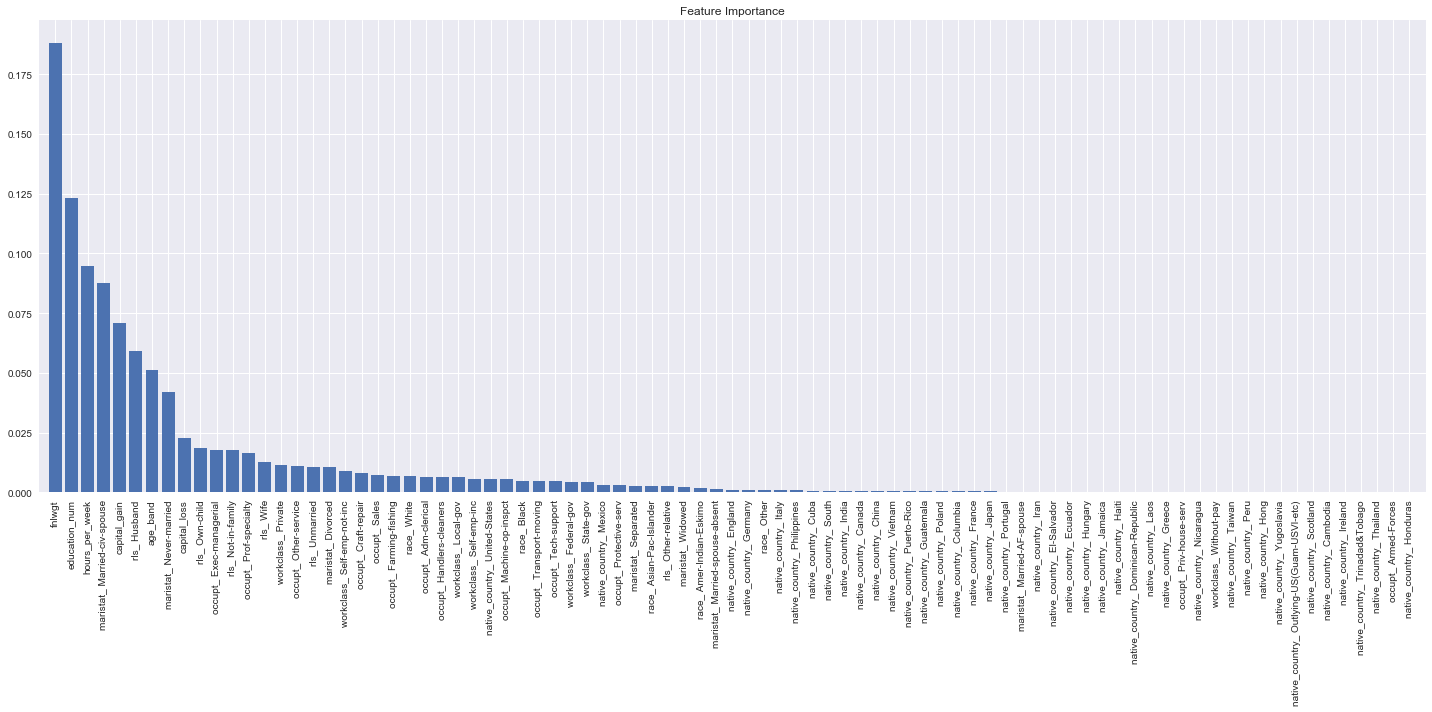

In [97]:
plt.figure(figsize=(20, 10))
feat_imp = feat_importances()
feat_imp.get_feat_importances(X, y)